In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib
from sklearn.decomposition import PCA
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_csv('vgsales.csv')
#df = df[:-15500]

In [3]:
number = LabelEncoder()

df['Name'] = number.fit_transform(df['Name'].astype('str'))
 

In [4]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
Year,1.632727
Publisher,0.349440


Text(0.5, 0, 'year')

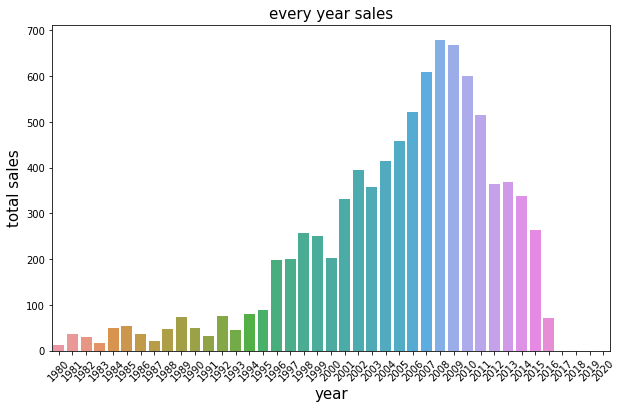

In [5]:
import seaborn as sns
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
year_sale = []
year_list = []
for year in year_range:
    year_sale.append(df[df['Year'] == year].dropna()['Global_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = year_list,y = year_sale,ax=ax)
plt.title('every year sales',fontsize=15 )
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.ylabel('total sales',fontsize=15)
plt.xlabel('year',fontsize=15)

In [7]:
df = df.drop(['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Platform','Year','Rank'], axis=1)


In [8]:
array = df.values
X = df[['Name']]
Y = df[['Global_Sales']]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (1949, 1)
Y_train shape: (1949, 1)
X_test shape: (650, 1)
Y_test shape: (650, 1)


In [10]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [11]:
#df = df[:-15500]

In [12]:
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

C:\Users\ailen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
param_grid_lr = [
    {}
]




param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]





In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("cross validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

cross validation score: 0.72
Test set score: 0.61


In [17]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

C:\Users\ailen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ailen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ailen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ailen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best cross-validation score: 0.61
Test set score: 0.51
